In this activity you will implement the convolution operation. Your implementation will serve as an image edge detector.

**Hint:** You will need to multiply each input pixel (3x3 neighbor grid) of the input 2D array image2D with the input filter kernel3x3 to obtain the output 2D array convolved2D.

**Image Source:** https://github.com/badriadhikari/AI-2020spring/blob/master/activities/cat-grayscale.jpg


### **Convert Image to CSV File Procedure**

In [1]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import *
from google.colab import files
import cv2

%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TensorFlow 1.x selected.


In [0]:
file_name1 = "cat-grayscale.jpg"
file_name2 = "my-cat.csv"

In [3]:
uploaded1 = files.upload()

Saving cat-grayscale.jpg to cat-grayscale.jpg


In [0]:
mColor = cv2.imread(file_name1)
mResized = cv2.resize(mColor, (128, 128), interpolation=cv2.INTER_AREA)
mGray = cv2.cvtColor(mResized, cv2.COLOR_BGR2GRAY)

(128, 128)


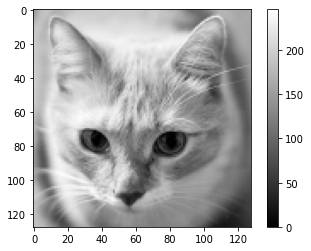

In [5]:
# Show Image and image data
print(mGray.shape)
plt.imshow(mGray, cmap="gray")
plt.colorbar()
plt.show()

In [6]:
# Show the sample of RBG (255 to 0)
print(mGray[:15, :15])

[[149 155 163 172 178 183 186 187 187 184 181 176 173 172 172]
 [144 153 163 172 180 184 187 188 187 182 178 174 170 170 171]
 [146 155 164 173 181 185 187 187 185 183 177 173 170 170 171]
 [149 158 168 176 183 186 187 187 185 180 176 178 187 186 181]
 [156 163 171 177 183 186 187 184 182 179 186 206 196 189 194]
 [160 167 174 180 183 185 185 183 180 182 206 176 131 129 135]
 [168 173 179 183 185 184 183 181 177 187 202 141 148 143 147]
 [174 178 184 186 187 184 180 177 174 189 184 130 145 160 168]
 [179 183 186 188 188 184 179 174 174 201 159 143 157 166 175]
 [184 187 188 189 187 183 177 174 174 194 146 147 174 198 202]
 [188 190 192 190 187 182 177 173 176 195 149 152 181 202 207]
 [190 192 194 191 187 182 177 174 179 205 161 164 192 210 215]
 [192 193 191 189 186 181 178 177 183 208 171 172 203 214 217]
 [194 193 191 187 184 180 177 178 185 206 171 172 202 218 223]
 [194 193 190 186 181 178 176 179 189 206 166 175 206 221 221]]


In [0]:
# Convert the image to CSV and download it to local machine
np.savetxt(file_name2, mGray, fmt="%.1f", delimiter=",")

# Uncomment this to download
# files.download(file_name2)

### **One Click Function: Convert Image to CSV File**

In [0]:
def imageToCsv(input_file_name, out_file_name, isDownload=False):
    uploaded = files.upload()
    color = cv2.imread(input_file_name)
    resized = cv2.resize(color, (128, 128), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    np.savetxt(out_file_name, gray, fmt="%.1f", delimiter=",")

    if isDownload:
        files.download(out_file_name)

### **Convolution Operation Procedure**

In [0]:
def convolution2D(image2D, kernel3x3):
    convolved2D = np.zeros((len(image2D)-2, len(image2D)-2))

    for row, pixel in enumerate(image2D):
        if row == 0 or row == len(image2D)-1:
            continue

        for col, px in enumerate(pixel):
            if col == 0 or col == len(image2D)-1:
                continue
        
            convolved2D[row-1,col-1] = np.sum(np.multiply(image2D[row-1:row+2,col-1:col+2],kernel3x3))
    return convolved2D

### **Testing Convolution Operation Function**

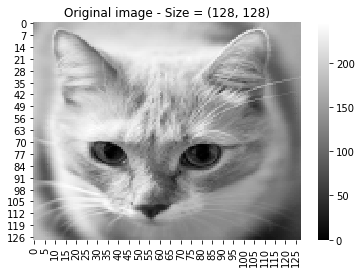

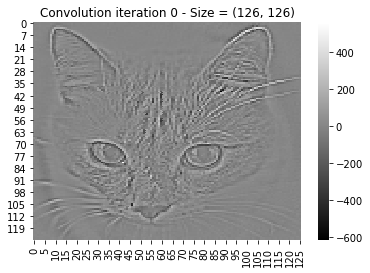

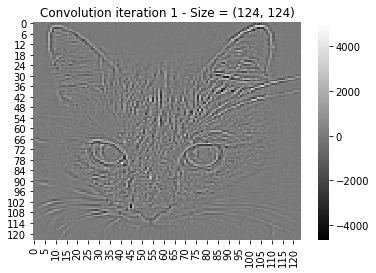

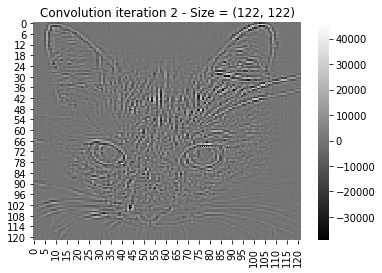

In [11]:
image2D = np.loadtxt(file_name2, delimiter=',')
sns.heatmap(image2D, cmap='gray')
plt.title('Original image - Size = ' + str(image2D.shape))
plt.show()

edge_detect_filter_3x3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
for i in range(3):
    convolved_image = convolution2D(image2D, edge_detect_filter_3x3)
    sns.heatmap(convolved_image, cmap='gray')
    plt.title('Convolution iteration ' + str(i) + ' - Size = ' + str(convolved_image.shape))
    plt.show()
    image2D = convolved_image

### **Testing on different image**

Saving Profile Logo.png to Profile Logo (1).png


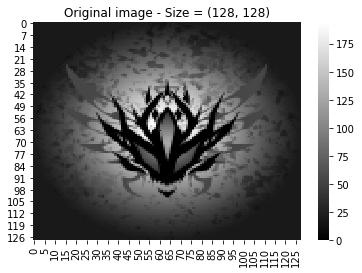

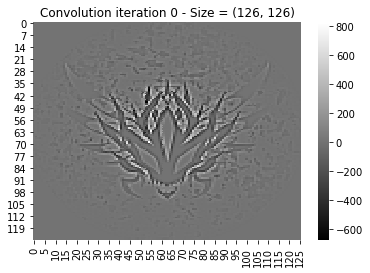

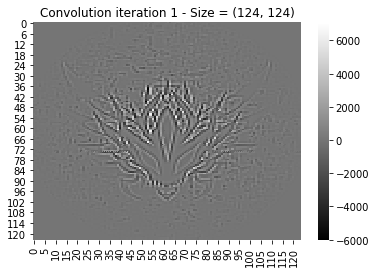

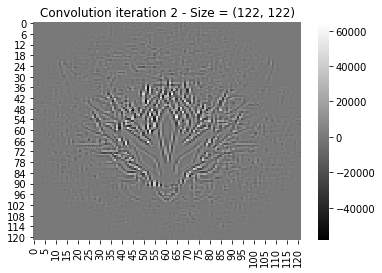

In [14]:
input_file = "Profile Logo.png"
output_file = "my-logo.png"
imageToCsv(input_file, output_file)

image2D = np.loadtxt(output_file, delimiter=',')
sns.heatmap(image2D, cmap='gray')
plt.title('Original image - Size = ' + str(image2D.shape))
plt.show()

edge_detect_filter_3x3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
for i in range(3):
    convolved_image = convolution2D(image2D, edge_detect_filter_3x3)
    sns.heatmap(convolved_image, cmap='gray')
    plt.title('Convolution iteration ' + str(i) + ' - Size = ' + str(convolved_image.shape))
    plt.show()
    image2D = convolved_image